# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
    }
plt.rcParams.update(tex_fonts)

# Robust MLR and Simple Dense

In [2]:
# metrics for robust and simple dense models
df_rreg_results = pd.read_csv('../prediction_results/robust_regression.csv')
df_rreg_results['date'] = pd.to_datetime(df_rreg_results['date'], format = '%Y-%m-%d %H:%M') # 
df_rreg_results.set_index('date', inplace=True) # date column as index
df_rreg_results = df_rreg_results[['NO$_2$ observed', 'NO$_2$ predicted']] # change place only for this df

df_simple_dense_results = pd.read_csv('../prediction_results/dense_predictions.csv')
df_simple_dense_results['date'] = pd.to_datetime(df_simple_dense_results['date'], format = '%Y-%m-%d %H:%M') # 
df_simple_dense_results.set_index('date', inplace=True) # date column as index

print('Robust\n------')
print('MSE:', mean_squared_error(df_rreg_results['NO$_2$ observed'], df_rreg_results['NO$_2$ predicted']).round(2))
print('RMSE', np.sqrt(mean_squared_error(df_rreg_results['NO$_2$ observed'], df_rreg_results['NO$_2$ predicted'])).round(2))
print('MAE:', mean_absolute_error(df_rreg_results['NO$_2$ observed'], df_rreg_results['NO$_2$ predicted']).round(2))
print('ME:',np.mean(df_rreg_results['NO$_2$ observed'] - df_rreg_results['NO$_2$ predicted']).round(2))
print('MAPE:', mean_absolute_percentage_error(df_rreg_results['NO$_2$ observed'], df_rreg_results['NO$_2$ predicted']).round(3))

print('\nSimple dense\n------------')
print('MSE:', mean_squared_error(df_simple_dense_results['NO$_2$ observed'], df_simple_dense_results['NO$_2$ predicted']).round(2))
print('RMSE',np.sqrt(mean_squared_error(df_simple_dense_results['NO$_2$ observed'], df_simple_dense_results['NO$_2$ predicted'])).round(2))
print('MAE',mean_absolute_error(df_simple_dense_results['NO$_2$ observed'], df_simple_dense_results['NO$_2$ predicted']).round(2))
print('ME:',np.mean(df_simple_dense_results['NO$_2$ observed'] - df_simple_dense_results['NO$_2$ predicted']).round(2))
print('MAPE',mean_absolute_percentage_error(df_simple_dense_results['NO$_2$ observed'], df_simple_dense_results['NO$_2$ predicted']).round(2))

Robust
------
MSE: 12.34
RMSE 3.51
MAE: 1.99
ME: 0.48
MAPE: 0.2

Simple dense
------------
MSE: 10.09
RMSE 3.18
MAE 1.93
ME: -0.24
MAPE 0.22


Robust MLR
        lb_stat      lb_pvalue     bp_stat      bp_pvalue
10  757.295651  3.109348e-156  756.625334  4.332040e-156

Simple Dense 
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
10  483.141454  1.763409e-97  482.716372  2.173380e-97


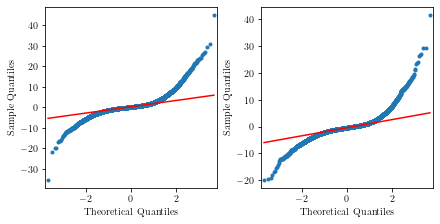

In [3]:
df_rreg_results['error'] = df_rreg_results['NO$_2$ observed'] - df_rreg_results['NO$_2$ predicted']
print('Robust MLR\n',sm.stats.acorr_ljungbox(df_rreg_results['error'].values, lags=[10], boxpierce=True, return_df=True))

df_simple_dense_results['error'] = df_simple_dense_results['NO$_2$ observed'] - df_simple_dense_results['NO$_2$ predicted']
print('\nSimple Dense \n',sm.stats.acorr_ljungbox(df_simple_dense_results['error'].values, lags=[10], boxpierce=True, return_df=True))


fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, figsize = (6, 3))

sm.qqplot(df_rreg_results['error'], line='q', marker=".", ax=ax1)
sm.qqplot(df_simple_dense_results['error'], line='q', marker=".", ax=ax2)

plt.show()

# Dense (6, 12, and 24 h)

In [4]:
# metrics for dense fitted with rolling windows
df_dense_6h_results = pd.read_csv('../prediction_results/dense_6_predictions.csv')
df_dense_6h_results['date'] = pd.to_datetime(df_dense_6h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_dense_6h_results.set_index('date', inplace=True) # date column as index

print('Dense 6h\n--------')
print('MSE',mean_squared_error(df_dense_6h_results['NO$_2$ observed'], df_dense_6h_results['NO$_2$ predicted']).round(2))
print('RMSE',np.sqrt(mean_squared_error(df_dense_6h_results['NO$_2$ observed'], df_dense_6h_results['NO$_2$ predicted'])).round(2))
print('MAE',mean_absolute_error(df_dense_6h_results['NO$_2$ observed'], df_dense_6h_results['NO$_2$ predicted']).round(2))
print('ME',np.mean(df_dense_6h_results['NO$_2$ observed'] - df_dense_6h_results['NO$_2$ predicted']).round(2))
print('MAPE',mean_absolute_percentage_error(df_dense_6h_results['NO$_2$ observed'], df_dense_6h_results['NO$_2$ predicted']).round(2))

df_dense_12h_results = pd.read_csv('../prediction_results/dense_12_predictions.csv')
df_dense_12h_results['date'] = pd.to_datetime(df_dense_12h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_dense_12h_results.set_index('date', inplace=True) # date column as index

print('\nDense 12h\n--------')
print('MSE',mean_squared_error(df_dense_12h_results['NO$_2$ observed'], df_dense_12h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_dense_12h_results['NO$_2$ observed'], df_dense_12h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_dense_12h_results['NO$_2$ observed'], df_dense_12h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_dense_12h_results['NO$_2$ observed'] - df_dense_12h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_dense_12h_results['NO$_2$ observed'], df_dense_12h_results['NO$_2$ predicted']).round(3))

df_dense_24h_results = pd.read_csv('../prediction_results/dense_24_predictions.csv')
df_dense_24h_results['date'] = pd.to_datetime(df_dense_24h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_dense_24h_results.set_index('date', inplace=True) # date column as index

print('\nDense 24h\n--------')
print('MSE',mean_squared_error(df_dense_24h_results['NO$_2$ observed'], df_dense_24h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_dense_24h_results['NO$_2$ observed'], df_dense_24h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_dense_24h_results['NO$_2$ observed'], df_dense_24h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_dense_24h_results['NO$_2$ observed'] - df_dense_24h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_dense_24h_results['NO$_2$ observed'], df_dense_24h_results['NO$_2$ predicted']).round(3))

Dense 6h
--------
MSE 10.41
RMSE 3.23
MAE 2.05
ME -0.32
MAPE 0.26

Dense 12h
--------
MSE 10.441
RMSE 3.231
MAE 2.065
ME -0.053
MAPE 0.255

Dense 24h
--------
MSE 11.136
RMSE 3.337
MAE 2.149
ME -0.042
MAPE 0.274


In [5]:
df_dense_6h_results['error'] = df_dense_6h_results['NO$_2$ observed'] - df_dense_6h_results['NO$_2$ predicted']
print('\nRNN\n',sm.stats.acorr_ljungbox(df_dense_6h_results['error'].values, lags=[10], boxpierce=True, return_df=True))


RNN
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
10  270.665685  2.421172e-52  270.474364  2.656753e-52


# Simple RNN

In [6]:
# metrics for dense fitted with rolling windows
df_RNN_6h_results = pd.read_csv('../prediction_results/RNN_6h_predictions.csv')
df_RNN_6h_results['date'] = pd.to_datetime(df_RNN_6h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_RNN_6h_results.set_index('date', inplace=True) # date column as index

print('RNN 6h\n--------')
print('MSE',mean_squared_error(df_RNN_6h_results['NO$_2$ observed'], df_RNN_6h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_RNN_6h_results['NO$_2$ observed'], df_RNN_6h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_RNN_6h_results['NO$_2$ observed'], df_RNN_6h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_RNN_6h_results['NO$_2$ observed'] - df_RNN_6h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_RNN_6h_results['NO$_2$ observed'], df_RNN_6h_results['NO$_2$ predicted']).round(3))

df_RNN_12h_results = pd.read_csv('../prediction_results/RNN_12h_predictions.csv')
df_RNN_12h_results['date'] = pd.to_datetime(df_RNN_12h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_RNN_12h_results.set_index('date', inplace=True) # date column as index

print('\nRNN 12h\n--------')
print('MSE',mean_squared_error(df_RNN_12h_results['NO$_2$ observed'], df_RNN_12h_results['NO$_2$ predicted']).round(2))
print('RMSE',np.sqrt(mean_squared_error(df_RNN_12h_results['NO$_2$ observed'], df_RNN_12h_results['NO$_2$ predicted'])).round(2))
print('MAE',mean_absolute_error(df_RNN_12h_results['NO$_2$ observed'], df_RNN_12h_results['NO$_2$ predicted']).round(2))
print('ME',np.mean(df_RNN_12h_results['NO$_2$ observed'] - df_RNN_12h_results['NO$_2$ predicted']).round(2))
print('MAPE',mean_absolute_percentage_error(df_RNN_12h_results['NO$_2$ observed'], df_RNN_12h_results['NO$_2$ predicted']).round(2))

df_RNN_24h_results = pd.read_csv('../prediction_results/RNN_24h_predictions.csv')
df_RNN_24h_results['date'] = pd.to_datetime(df_RNN_24h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_RNN_24h_results.set_index('date', inplace=True) # date column as index

print('\nRNN 24h\n--------')
print('MSE',mean_squared_error(df_RNN_24h_results['NO$_2$ observed'], df_RNN_24h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_RNN_24h_results['NO$_2$ observed'], df_RNN_24h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_RNN_24h_results['NO$_2$ observed'], df_RNN_24h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_RNN_24h_results['NO$_2$ observed'] - df_RNN_24h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_RNN_24h_results['NO$_2$ observed'], df_RNN_24h_results['NO$_2$ predicted']).round(3))

RNN 6h
--------
MSE 11.395
RMSE 3.376
MAE 2.041
ME 0.096
MAPE 0.239

RNN 12h
--------
MSE 10.99
RMSE 3.32
MAE 2.09
ME -0.05
MAPE 0.27

RNN 24h
--------
MSE 23.49
RMSE 4.847
MAE 3.384
ME 0.499
MAPE 0.492


In [7]:
df_RNN_12h_results['error'] = df_RNN_12h_results['NO$_2$ observed'] - df_RNN_12h_results['NO$_2$ predicted']
print('\nRNN\n',sm.stats.acorr_ljungbox(df_RNN_12h_results['error'].values, lags=[10], boxpierce=True, return_df=True))


RNN
       lb_stat     lb_pvalue    bp_stat     bp_pvalue
10  72.263221  1.617932e-11  72.206783  1.659197e-11


# LSTM

In [8]:
df_lstm_6h_results = pd.read_csv('../prediction_results/LSTM_6h_predictions.csv')
df_lstm_6h_results['date'] = pd.to_datetime(df_lstm_6h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_lstm_6h_results.set_index('date', inplace=True) # date column as index

df_lstm_12h_results = pd.read_csv('../prediction_results/LSTM_12h_predictions.csv')
df_lstm_12h_results['date'] = pd.to_datetime(df_lstm_12h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_lstm_12h_results.set_index('date', inplace=True) # date column as index

df_lstm_24h_results = pd.read_csv('../prediction_results/LSTM_24h_predictions.csv')
df_lstm_24h_results['date'] = pd.to_datetime(df_lstm_24h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_lstm_24h_results.set_index('date', inplace=True) # date column as index

print('\nLSTM 6h \n-------')
print('MSE',mean_squared_error(df_lstm_6h_results['NO$_2$ observed'], df_lstm_6h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_lstm_6h_results['NO$_2$ observed'], df_lstm_6h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_lstm_6h_results['NO$_2$ observed'], df_lstm_6h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_lstm_6h_results['NO$_2$ observed'] - df_lstm_6h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_lstm_6h_results['NO$_2$ observed'], df_lstm_6h_results['NO$_2$ predicted']).round(3))

print('\nLSTM 12h \n-------')
print('MSE',mean_squared_error(df_lstm_12h_results['NO$_2$ observed'], df_lstm_12h_results['NO$_2$ predicted']).round(2))
print('RMSE',np.sqrt(mean_squared_error(df_lstm_12h_results['NO$_2$ observed'], df_lstm_12h_results['NO$_2$ predicted'])).round(2))
print('MAE',mean_absolute_error(df_lstm_12h_results['NO$_2$ observed'], df_lstm_12h_results['NO$_2$ predicted']).round(2))
print('ME',np.mean(df_lstm_12h_results['NO$_2$ observed'] - df_lstm_12h_results['NO$_2$ predicted']).round(2))
print('MAPE',mean_absolute_percentage_error(df_lstm_12h_results['NO$_2$ observed'], df_lstm_12h_results['NO$_2$ predicted']).round(2))

print('\nLSTM 24h \n-------')
print('MSE',mean_squared_error(df_lstm_24h_results['NO$_2$ observed'], df_lstm_24h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_lstm_24h_results['NO$_2$ observed'], df_lstm_24h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_lstm_24h_results['NO$_2$ observed'], df_lstm_24h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_lstm_24h_results['NO$_2$ observed'] - df_lstm_24h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_lstm_24h_results['NO$_2$ observed'], df_lstm_24h_results['NO$_2$ predicted']).round(3))


LSTM 6h 
-------
MSE 9.802
RMSE 3.131
MAE 1.895
ME 0.01
MAPE 0.219

LSTM 12h 
-------
MSE 9.62
RMSE 3.1
MAE 1.89
ME -0.08
MAPE 0.22

LSTM 24h 
-------
MSE 9.751
RMSE 3.123
MAE 1.904
ME -0.051
MAPE 0.225



LSTM 
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
10  138.435905  8.813431e-25  138.337744  9.230949e-25


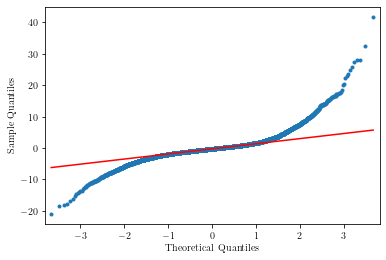

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

df_lstm_12h_results['error'] = df_lstm_12h_results['NO$_2$ observed'] - df_lstm_12h_results['NO$_2$ predicted']
sm.qqplot(df_lstm_12h_results['error'], line='q', marker=".")
print('\nLSTM \n',sm.stats.acorr_ljungbox(df_lstm_12h_results['error'].values, lags=[10], boxpierce=True, return_df=True))

# GRU

In [10]:
df_GRU_6h_results = pd.read_csv('../prediction_results/GRU_6h_predictions.csv')
df_GRU_6h_results['date'] = pd.to_datetime(df_GRU_6h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_GRU_6h_results.set_index('date', inplace=True) # date column as index

print('GRU 6h\n--------')
print('MSE',mean_squared_error(df_GRU_6h_results['NO$_2$ observed'], df_GRU_6h_results['NO$_2$ predicted']).round(3))
print('RMSE',np.sqrt(mean_squared_error(df_GRU_6h_results['NO$_2$ observed'], df_GRU_6h_results['NO$_2$ predicted'])).round(3))
print('MAE',mean_absolute_error(df_GRU_6h_results['NO$_2$ observed'], df_GRU_6h_results['NO$_2$ predicted']).round(3))
print('ME',np.mean(df_GRU_6h_results['NO$_2$ observed'] - df_GRU_6h_results['NO$_2$ predicted']).round(3))
print('MAPE',mean_absolute_percentage_error(df_GRU_6h_results['NO$_2$ observed'], df_GRU_6h_results['NO$_2$ predicted']).round(3))

df_GRU_12h_results = pd.read_csv('../prediction_results/GRU_12h_predictions.csv')
df_GRU_12h_results['date'] = pd.to_datetime(df_GRU_12h_results['date'], format = '%Y-%m-%d %H:%M') # 
df_GRU_12h_results.set_index('date', inplace=True) # date column as index

print('\nGRU 12h\n--------')
print('MSE',mean_squared_error(df_GRU_12h_results['NO$_2$ observed'], df_GRU_12h_results['NO$_2$ predicted']).round(2))
print('RMSE',np.sqrt(mean_squared_error(df_GRU_12h_results['NO$_2$ observed'], df_GRU_12h_results['NO$_2$ predicted'])).round(2))
print('MAE',mean_absolute_error(df_GRU_12h_results['NO$_2$ observed'], df_GRU_12h_results['NO$_2$ predicted']).round(2))
print('ME',np.mean(df_GRU_12h_results['NO$_2$ observed'] - df_GRU_12h_results['NO$_2$ predicted']).round(2))
print('MAPE',mean_absolute_percentage_error(df_GRU_12h_results['NO$_2$ observed'], df_GRU_12h_results['NO$_2$ predicted']).round(3))

GRU 6h
--------
MSE 10.684
RMSE 3.269
MAE 1.997
ME 0.346
MAPE 0.237

GRU 12h
--------
MSE 10.63
RMSE 3.26
MAE 2.06
ME -0.02
MAPE 0.259


In [11]:
df_GRU_12h_results['error'] = df_GRU_12h_results['NO$_2$ observed'] - df_GRU_12h_results['NO$_2$ predicted']
print('\nGRU\n',sm.stats.acorr_ljungbox(df_GRU_12h_results['error'].values, lags=[10], boxpierce=True, return_df=True))


GRU
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
10  167.292064  1.008264e-30  167.176338  1.065409e-30


# Correlation, prediction, and QQ-plots

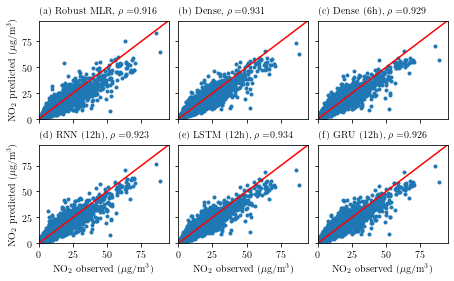

In [12]:
rho_robust = stats.pearsonr(df_rreg_results.iloc[:,0], df_rreg_results.iloc[:,1])
rho_simple_dense = stats.pearsonr(df_simple_dense_results.iloc[:,0], df_simple_dense_results.iloc[:,1])
rho_dense = stats.pearsonr(df_dense_6h_results.iloc[:,0], df_dense_6h_results.iloc[:,1])
rho_RNN = stats.pearsonr(df_RNN_12h_results.iloc[:,0], df_RNN_12h_results.iloc[:,1])
rho_LSTM = stats.pearsonr(df_lstm_12h_results.iloc[:,0], df_lstm_12h_results.iloc[:,1])
rho_GRU = stats.pearsonr(df_GRU_12h_results.iloc[:,0], df_GRU_12h_results.iloc[:,1])

# fig, (ax1, ax2, ax3) = plt.subplots(1,3, constrained_layout=True, figsize=(6.15, 2), sharey=True)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, constrained_layout = True, 
                                                       figsize = (6.2, 3.8), sharey=True, sharex=True)

ax1.scatter(df_rreg_results['NO$_2$ observed'], df_rreg_results['NO$_2$ predicted'], marker='.')
# ax1.set_xlabel('NO$_2$ (actual)')
ax1.set_ylabel('NO$_2$ predicted ($\mu$g/m$^3$)')
# ax1.set_xlabel('NO$_2$ observed ($\mu$g/m$^3$)')
ax1.annotate(r'(a) Robust MLR, $\rho = $' + str(round(rho_robust[0],3)), xy=(0, 1.07), xycoords="axes fraction")
ax1.set_ylim(0.0, 95.0)
ax1.set_xlim(0.0, 95.0)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax1.transAxes
line.set_transform(transform)
ax1.add_line(line)

ax2.scatter(df_simple_dense_results['NO$_2$ observed'], df_simple_dense_results['NO$_2$ predicted'], marker='.')
# ax2.set_ylabel('NO$_2$ predicted ($\mu$g/m$^3$)')
# ax2.set_xlabel('NO$_2$ observed ($\mu$g/m$^3$)')
ax2.annotate(r'(b) Dense, $\rho = $' + str(round(rho_simple_dense[0],3)), xy=(0, 1.07), xycoords="axes fraction")
ax2.set_ylim(0.0, 95.0)
ax2.set_xlim(0.0, 95.0)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax2.transAxes
line.set_transform(transform)
ax2.add_line(line)

ax3.scatter(df_dense_6h_results['NO$_2$ observed'], df_dense_6h_results['NO$_2$ predicted'], marker='.')
# ax2.set_ylabel('NO$_2$ predicted ($\mu$g/m$^3$)')
# ax3.set_xlabel('NO$_2$ observed ($\mu$g/m$^3$)')
ax3.annotate(r'(c) Dense (6h), $\rho = $' + str(round(rho_dense[0],3)), xy=(0, 1.07), xycoords="axes fraction")
ax3.set_ylim(0.0, 95.0)
ax3.set_xlim(0.0, 95.0)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax3.transAxes
line.set_transform(transform)
ax3.add_line(line)

ax4.scatter(df_RNN_12h_results['NO$_2$ observed'], df_RNN_12h_results['NO$_2$ predicted'], marker='.')
ax4.set_ylabel('NO$_2$ predicted ($\mu$g/m$^3$)')
ax4.set_xlabel('NO$_2$ observed ($\mu$g/m$^3$)')
ax4.annotate(r'(d) RNN (12h), $\rho = $' + str(round(rho_RNN[0],3)), xy=(0, 1.07), xycoords="axes fraction")
ax4.set_ylim(0.0, 95.0)
ax4.set_xlim(0.0, 95.0)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax4.transAxes
line.set_transform(transform)
ax4.add_line(line)

ax5.scatter(df_lstm_12h_results['NO$_2$ observed'], df_lstm_12h_results['NO$_2$ predicted'], marker='.')
ax5.set_xlabel('NO$_2$ observed ($\mu$g/m$^3$)')
# ax3.set_ylabel('NO$_2$ predicted ($\mu$g/m$^3$)')
ax5.annotate(r'(e) LSTM (12h), $\rho = $' + str(round(rho_LSTM[0],3)), xy=(0, 1.07), xycoords="axes fraction")
ax5.set_ylim(0.0, 95.0)
ax5.set_xlim(0.0, 95.0)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax5.transAxes
line.set_transform(transform)
ax5.add_line(line)

ax6.scatter(df_GRU_12h_results['NO$_2$ observed'], df_GRU_12h_results['NO$_2$ predicted'], marker='.')
ax6.set_xlabel('NO$_2$ observed ($\mu$g/m$^3$)')
# ax3.set_ylabel('NO$_2$ predicted ($\mu$g/m$^3$)')
ax6.annotate(r'(f) GRU (12h), $\rho = $' + str(round(rho_GRU[0],3)), xy=(0, 1.07), xycoords="axes fraction")
ax6.set_ylim(0.0, 95.0)
ax6.set_xlim(0.0, 95.0)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax6.transAxes
line.set_transform(transform)
ax6.add_line(line)

# plt.savefig('../plots/correlations.pdf')
plt.savefig('../plots/correlations_all.pdf')

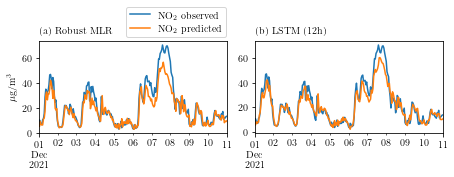

In [13]:
start = '2021-12-01 00:00:00'
end = '2021-12-11 00:00'

fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, sharex=True, figsize=(6.2, 2.35), sharey=False)

df_rreg_results.iloc[:,[0,1]][start:end].plot(ax=ax1)
ax1.annotate('(a) Robust MLR', xy=(0, 1.07), xycoords="axes fraction")
ax1.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
ax1.set_xlabel('')
ax1.set_ylabel('$\mu$g/m$^3$')
ax1.set_xticks([], major=True)

# df_simple_dense_results.iloc[:,[0,1]][start:end].plot(ax=ax2)
# ax2.annotate('(b) Dense', xy=(0, 1.07), xycoords="axes fraction")
# ax2.get_legend().remove()
# ax2.set_xlabel('')
# ax2.set_ylabel('$\mu$g/m$^3$')
# ax2.set_xticks([], major=True)

# df_dense_results[start:end].plot(ax=ax2)
# ax2.annotate('(b) Dense model', xy=(0, 1.07), xycoords="axes fraction")
# ax2.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
# ax2.get_legend().remove()
# ax2.set_xlabel('')
# ax2.set_xticks([], major=True)

# df_RNN_results[start:end].plot(ax=ax3)
# ax3.annotate('(c) RNN model', xy=(0, 1.07), xycoords="axes fraction")
# #ax2.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
# ax3.get_legend().remove()
# ax3.set_ylabel('$\mu$g/m$^3$')
# ax3.set_xlabel('')

df_lstm_12h_results.iloc[:,[0,1]][start:end].plot(ax=ax2)
ax2.annotate('(b) LSTM (12h)', xy=(0, 1.07), xycoords="axes fraction")
#ax2.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
# ax2.set_ylabel('$\mu$g/m$^3$')
ax2.get_legend().remove()
ax2.set_xlabel('')

plt.savefig('../plots/predictions.pdf')
# plt.savefig('../plots/predictions_all.pdf')

Robust MLR
         lb_stat      lb_pvalue      bp_stat      bp_pvalue
50  1523.086759  4.443921e-286  1520.073382  1.912048e-285

Simple Dense 
        lb_stat      lb_pvalue     bp_stat      bp_pvalue
50  868.370128  9.374487e-150  866.758891  2.006838e-149

Dense (6h) 
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
50  609.191264  3.698040e-97  607.939402  6.583320e-97

RNN (12h) 
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
50  239.229913  1.667938e-26  238.620224  2.129347e-26

LSTM 
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
50  315.989529  2.688124e-40  315.335917  3.547772e-40

GRU 
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
50  506.059835  1.088943e-76  504.713314  2.003311e-76


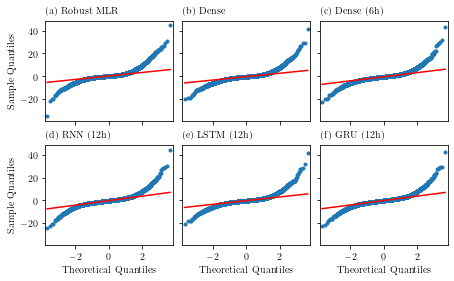

In [14]:
df_rreg_results['error'] = df_rreg_results['NO$_2$ observed'] - df_rreg_results['NO$_2$ predicted']
print('Robust MLR\n',sm.stats.acorr_ljungbox(df_rreg_results['error'].values, lags=[50], boxpierce=True, return_df=True))

df_simple_dense_results['error'] = df_simple_dense_results['NO$_2$ observed'] - df_simple_dense_results['NO$_2$ predicted']
print('\nSimple Dense \n',sm.stats.acorr_ljungbox(df_simple_dense_results['error'].values, lags=[50], boxpierce=True, return_df=True))

df_dense_6h_results['error'] = df_dense_6h_results['NO$_2$ observed'] - df_dense_6h_results['NO$_2$ predicted']
print('\nDense (6h) \n',sm.stats.acorr_ljungbox(df_dense_6h_results['error'].values, lags=[50], boxpierce=True, return_df=True))

df_RNN_12h_results['error'] = df_RNN_12h_results['NO$_2$ observed'] - df_RNN_12h_results['NO$_2$ predicted']
print('\nRNN (12h) \n',sm.stats.acorr_ljungbox(df_RNN_12h_results['error'].values, lags=[50], boxpierce=True, return_df=True))

df_lstm_12h_results['error'] = df_lstm_12h_results['NO$_2$ observed'] - df_lstm_12h_results['NO$_2$ predicted']
print('\nLSTM \n',sm.stats.acorr_ljungbox(df_lstm_12h_results['error'].values, lags=[50], boxpierce=True, return_df=True))

df_GRU_12h_results['error'] = df_GRU_12h_results['NO$_2$ observed'] - df_GRU_12h_results['NO$_2$ predicted']
print('\nGRU \n',sm.stats.acorr_ljungbox(df_GRU_12h_results['error'].values, lags=[50], boxpierce=True, return_df=True))

### QQ-plots ###
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, constrained_layout = True, 
                                                       figsize = (6.2, 3.8), sharey=True, sharex=True)

sm.qqplot(df_rreg_results['error'], line='q', marker=".", ax=ax1)
ax1.annotate('(a) Robust MLR', xy=(0, 1.07), xycoords="axes fraction")
ax1.set_xlabel('')

sm.qqplot(df_simple_dense_results['error'], line='q', marker=".", ax=ax2)
ax2.set_ylabel('')
ax2.annotate('(b) Dense', xy=(0, 1.07), xycoords="axes fraction")
ax2.set_xlabel('')

sm.qqplot(df_dense_6h_results['error'], line='q', marker=".", ax=ax3)
ax3.set_ylabel('')
ax3.annotate('(c) Dense (6h)', xy=(0, 1.07), xycoords="axes fraction")
ax3.set_xlabel('')

sm.qqplot(df_RNN_12h_results['error'], line='q', marker=".", ax=ax4)
# ax4.set_ylabel('')
ax4.annotate('(d) RNN (12h)', xy=(0, 1.07), xycoords="axes fraction")

sm.qqplot(df_lstm_12h_results['error'], line='q', marker=".", ax=ax5)
ax5.set_ylabel('')
ax5.annotate('(e) LSTM (12h)', xy=(0, 1.07), xycoords="axes fraction")

sm.qqplot(df_GRU_12h_results['error'], line='q', marker=".", ax=ax6)
ax6.set_ylabel('')
ax6.annotate('(f) GRU (12h)', xy=(0, 1.07), xycoords="axes fraction")

# plt.savefig('../plots/qq_pred_errors.pdf')
plt.savefig('../plots/qq_pred_errors_all.pdf')

# Quality function (not used)

In [15]:
def quality_function(O, P):
    a = 1e-1
    b = 1e2
    c = 1e3
    if (O <= 40 and P <= 40):
        I_40 = 1
    else:
        I_40 = 0
    if (O >= 65 and P >= 65):
        I_80 = 1
    else:
        I_80 = 0
    D = 1 + 0.5 * (np.sqrt(np.abs(O-40) + np.abs(P-40) + b*I_40 + c*I_80))
    return 1 - min(((a*np.abs(O-P))/D), 1)


def assign_quality(df):
    df['quality'] = 0
    for i in range(df.shape[0]):
        q = quality_function(df.iloc[i,0], df.iloc[i,1])
        if q > .8:
            df.iloc[i,2] = 5
        if q >= .6 and q < .8:
            df.iloc[i,2] = 4
        if q >= .4 and q < .6:
            df.iloc[i,2] = 3
        if q >= .2 and q < .4:
            df.iloc[i,2] = 3
        if q >=0 and q < .2:
            df.iloc[i,2] = 1
    return df



In [16]:
quality_rreg = assign_quality(df_rreg_results)
print('Robust regression\n-----------------')
print(np.sum(quality_rreg['quality'] == 1))
print(np.sum(quality_rreg['quality'] == 2))
print(np.sum(quality_rreg['quality'] == 3))
print(np.sum(quality_rreg['quality'] == 4))
print(np.sum(quality_rreg['quality'] == 5))

Robust regression
-----------------
0
0
0
0
0


In [17]:
quality_simple_dense = assign_quality(df_simple_dense_results)
print('Simple dense\n------------')
print(np.sum(quality_simple_dense['quality'] == 1))
print(np.sum(quality_simple_dense['quality'] == 2))
print(np.sum(quality_simple_dense['quality'] == 3))
print(np.sum(quality_simple_dense['quality'] == 4))
print(np.sum(quality_simple_dense['quality'] == 5))

Simple dense
------------
0
0
0
0
0


In [18]:
quality_lstm = assign_quality(df_lstm_6h_results)
print('LSTM 6h \n-------')
print(np.sum(df_lstm_6h_results['quality'] == 1))
print(np.sum(df_lstm_6h_results['quality'] == 2))
print(np.sum(df_lstm_6h_results['quality'] == 3))
print(np.sum(df_lstm_6h_results['quality'] == 4))
print(np.sum(df_lstm_6h_results['quality'] == 5))

LSTM 6h 
-------
1
0
34
97
8031


In [19]:
df_lstm_12h_results = assign_quality(df_lstm_12h_results)
print('LSTM 12h \n-------')
print(np.sum(df_lstm_12h_results['quality'] == 1))
print(np.sum(df_lstm_12h_results['quality'] == 2))
print(np.sum(df_lstm_12h_results['quality'] == 3))
print(np.sum(df_lstm_12h_results['quality'] == 4))
print(np.sum(df_lstm_12h_results['quality'] == 5))

LSTM 12h 
-------
0
0
0
0
0


In [20]:
df_lstm_24h_results = assign_quality(df_lstm_24h_results)
print('LSTM 12h \n-------')
print(np.sum(df_lstm_24h_results['quality'] == 1))
print(np.sum(df_lstm_24h_results['quality'] == 2))
print(np.sum(df_lstm_24h_results['quality'] == 3))
print(np.sum(df_lstm_24h_results['quality'] == 4))
print(np.sum(df_lstm_24h_results['quality'] == 5))

LSTM 12h 
-------
1
0
35
92
8017


# Kruskall-Wallis and Dunn's test

In [88]:
group1 = (df_rreg_results['NO$_2$ observed'] - df_rreg_results['NO$_2$ predicted'])**2
group2 = (df_simple_dense_results['NO$_2$ observed'] - df_simple_dense_results['NO$_2$ predicted'])**2
group3 = (df_lstm_12h_results['NO$_2$ observed'] - df_lstm_12h_results['NO$_2$ predicted'])**2

In [89]:
np.mean(group1)

12.341475708641264

In [76]:
from scipy import stats
stats.kruskal(group1, group2, group3)

KruskalResult(statistic=20.192690071670206, pvalue=4.1229974248177264e-05)

In [77]:
import scikit_posthocs as sp
sp.posthoc_dunn([group1, group2, group3], p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000804,0.000125
2,0.000804,1.000000,1.000000
3,0.000125,1.000000,1.000000
